## **Importing Liberaries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/modyreturn/Health_Care_Analysis/refs/heads/master/merged_data.csv"

df = pd.read_csv(url)

df.head()


,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
2,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,9-12 Months,1,Inpatient,Other
3,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other
4,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other


## **Cleaning The Data**

In [2]:
# converting Archive_Date to datetime
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month_Name'] = df['Archive_Date'].dt.month_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Archive_Date     452991 non-null  datetime64[ns]
 1   Specialty_HIPE   452800 non-null  float64       
 2   Specialty_Name   452991 non-null  object        
 3   Adult_Child      452991 non-null  object        
 4   Age_Profile      452816 non-null  object        
 5   Time_Bands       452989 non-null  object        
 6   Total            452991 non-null  int64         
 7   Case_Type        452991 non-null  object        
 8   Specialty Group  452991 non-null  object        
 9   Year             452991 non-null  int32         
 10  Month_Name       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 36.3+ MB


In [3]:
df['Time_Bands'] = df['Time_Bands'].str.strip()
df['Age_Profile'] = df['Age_Profile'].str.strip()

In [4]:
# I will use the following func to format the values on axis of the charts as needed
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)

In [5]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## **Exploratory Data Analysis (EDA):**

### **Statistic Summary**

In [6]:
# using describe() to get statistic summary for the data
df.describe(include=('all'))

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group,Year,Month_Name
count,452991,452800.000000,452991,452991,452816,452989,452991.000000,452991,452991,452991.000000,452991
unique,NaN,NaN,78,3,3,8,NaN,3,27,NaN,12
top,NaN,NaN,General Surgery,Adult,16-64,0-3 Months,NaN,Outpatient,General,NaN,March
freq,NaN,NaN,43634,368151,203354,93818,NaN,270281,76614,NaN,47110
mean,2019-09-09 18:57:46.892720640,2619.144576,NaN,NaN,NaN,NaN,54.390059,NaN,NaN,2019.181778,NaN
min,2018-01-31 00:00:00,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2018.000000,NaN
25%,2018-10-31 00:00:00,1300.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2018.000000,NaN
50%,2019-08-31 00:00:00,1900.000000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,2019.000000,NaN
75%,2020-06-30 00:00:00,2600.000000,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,2020.000000,NaN
max,2021-03-31 00:00:00,9000.000000,NaN,NaN,NaN,NaN,4239.000000,NaN,NaN,2021.000000,NaN


### **Segment Insights:**
-   1- Time Band vs Case Type:
    -   Day Cases & Inpatient Cases.
    -   Outpatient Cases.


In [7]:
df['Time_Bands'] = df['Time_Bands'].replace('18 Months +', '18+ Months')
df['Time_Bands'].unique()

array(['0-3 Months', '9-12 Months', '12-15 Months', '6-9 Months',
       '3-6 Months', '15-18 Months', '18+ Months', nan], dtype=object)

In [8]:
time_band_ordered = ['0-3 Months', '3-6 Months', '6-9 Months', '9-12 Months', '12-15 Months', '15-18 Months', '18+ Months']

In [9]:
time_band_df = df.groupby(['Time_Bands', 'Case_Type'])['Total'].sum().reset_index()
time_band_df.head()

,Time_Bands,Case_Type,Total
0,0-3 Months,Day Case,782718
1,0-3 Months,Inpatient,261174
2,0-3 Months,Outpatient,5940446
3,12-15 Months,Day Case,114064
4,12-15 Months,Inpatient,57880


In [10]:
df_time_band_pivot = time_band_df.pivot(columns='Case_Type', index='Time_Bands', values='Total').reset_index()
df_time_band_pivot['Time_Bands'] = pd.Categorical(df_time_band_pivot['Time_Bands'], categories=time_band_ordered, ordered=True)
df_time_band_pivot.head(2)

Case_Type,Time_Bands,Day Case,Inpatient,Outpatient
0,0-3 Months,782718,261174,5940446
1,12-15 Months,114064,57880,1675924


In [11]:
# df to be melted and reshaped for plotting
df_melted = df_time_band_pivot.melt(id_vars='Time_Bands',
                                    value_vars=df_time_band_pivot.columns[1:-1], # Exclude the first and last columns 
                                    var_name='Case Type',
                                    value_name='Total Cases')

df_melted.head(2)

,Time_Bands,Case Type,Total Cases
0,0-3 Months,Day Case,782718
1,12-15 Months,Day Case,114064


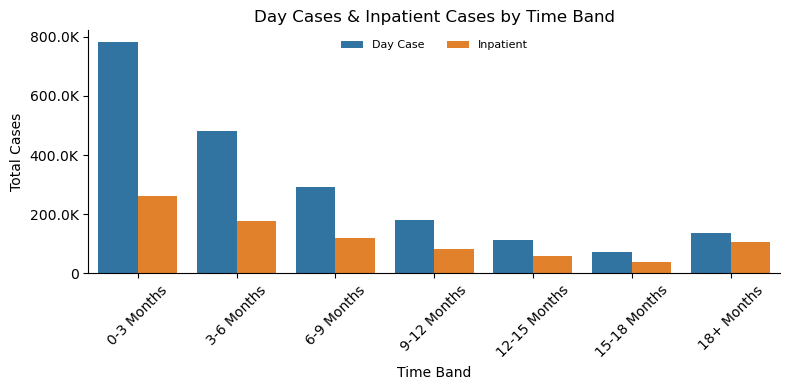

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_melted,
    x='Time_Bands',
    y='Total Cases',
    hue='Case Type',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Day Cases & Inpatient Cases by Time Band')
plt.xlabel('Time Band')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**:
-   Early Treatment Dominance
    - **0–3 Months**: The majority of both **Day Cases (~800K)** and **Inpatients (~270K)** occur within this window.
    - Reflects **prompt access to care** post-referral, particularly for less complex treatments.

-   Declining Trend Over Time
    - Both case types **decrease steadily** across subsequent time bands (3–6, 6–9, etc.).
    - Suggests that **delays in care** reduce case volume or possibly shift to long-term pathways.

-   18+ Months
    - A notable uptick in **both Day Case and Inpatient** cases is seen in the **18+ Months** band.
    - Indicates a **backlog or long-waiting patients**, which may require prioritization.

---

In [13]:
df_melted_outpatient = df_time_band_pivot.melt(id_vars='Time_Bands',
                                    value_vars=df_time_band_pivot.columns[3:], # Exclude the first 3 columns
                                    var_name='Case Type',
                                    value_name='Total Cases')
df_melted_outpatient.head(2)

,Time_Bands,Case Type,Total Cases
0,0-3 Months,Outpatient,5940446
1,12-15 Months,Outpatient,1675924


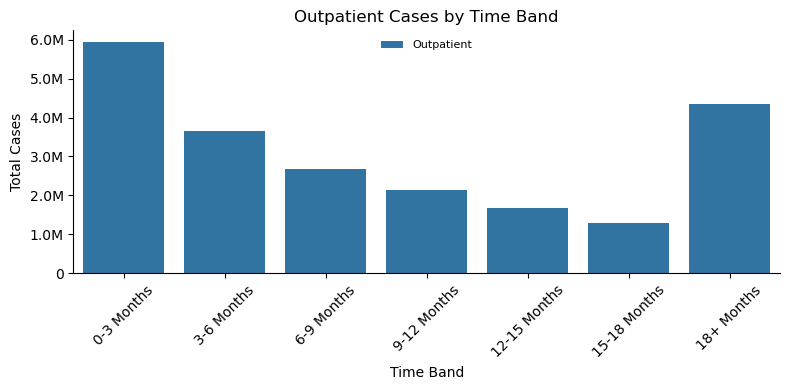

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_melted_outpatient,
    x='Time_Bands',
    y='Total Cases',
    hue='Case Type',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Outpatient Cases by Time Band')
plt.xlabel('Time Band')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**
-   Strong Start
    - **0–3 Months** sees the **highest volume** (~6M cases), indicating strong early service responsiveness for outpatient care.

-   Gradual Decline
    - There is a **steady drop** from **3–6 Months (~3.7M)** to **15–18 Months (~1.3M)**.
    - Suggests many patients are treated earlier in the timeline.
    - May reflect **effective triage or short-term needs** being prioritized.

-   Noticeable Rise in 18+ Months
    - A significant **uptick (~4.3M cases)** occurs in the **18+ Months** band.
    - Implies a **backlog of long-waiting patients** or **deferred outpatient services**.
    - This echoes patterns seen in Day Case and Inpatient plots.

---

### **Segment Insights:**
-   2- Adult vs Child Cases:


In [15]:
child_vs_adult = df['Adult_Child'].value_counts().to_frame().reset_index()
child_vs_adult = child_vs_adult[child_vs_adult['Adult_Child'].isin(['Adult', 'Child'])]

child_vs_adult

,Adult_Child,count
0,Adult,368151
1,Child,84665


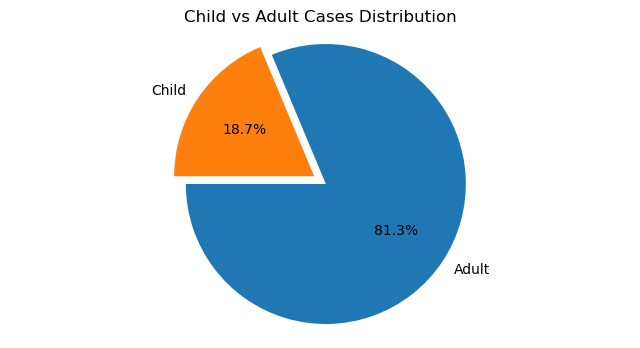

In [16]:
# Example explode if not defined already
explode = [0.05] * len(child_vs_adult)  # Slightly pop out all slices

plt.figure(figsize=(8, 4))

plt.pie(
    x=child_vs_adult['count'],
    labels=child_vs_adult['Adult_Child'],
    colors=sns.color_palette('tab10', n_colors=len(child_vs_adult)),
    autopct='%1.1f%%',
    startangle=180,
    explode=explode,
    textprops={'fontsize': 10}  # Optional: adjust font size
)

plt.title('Child vs Adult Cases Distribution', fontsize=12)
plt.axis('equal')  # equal aspect ratio ensures the pie is circular
plt.show()

**Insights**
-   🔹 Adult-Dominated Caseload
        - **Adults account for 81.3%** of total cases.
        - Reflects the **greater healthcare demand** from the adult population.
        - Likely influenced by chronic conditions, preventative care, and age-related needs.

-   🔸 Child Segment
        - **Children make up 18.7%** of the cases.
        - Though smaller, this segment is still **significant**, especially for planning pediatric resources.

---

In [17]:
adult_vs_child_df = df.groupby(['Month_Name','Adult_Child'])['Total'].sum()
adult_vs_child_df.dropna(inplace=True)
adult_vs_child_df = adult_vs_child_df.reset_index()
adult_vs_child_df['Month_Name'] = adult_vs_child_df['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters
adult_vs_child_df['Month_Name'] = pd.Categorical(adult_vs_child_df['Month_Name'], categories=month_order, ordered=True)
adult_vs_child_df = adult_vs_child_df[adult_vs_child_df['Adult_Child'].isin(['Adult', 'Child'])]
adult_vs_child_df

,Month_Name,Adult_Child,Total
1,Apr,Adult,1584460
2,Apr,Child,278210
4,Aug,Adult,1639213
5,Aug,Child,275741
7,Dec,Adult,1618434
8,Dec,Child,266412
10,Feb,Adult,2162622
11,Feb,Child,363126
13,Jan,Adult,2144065
14,Jan,Child,362021


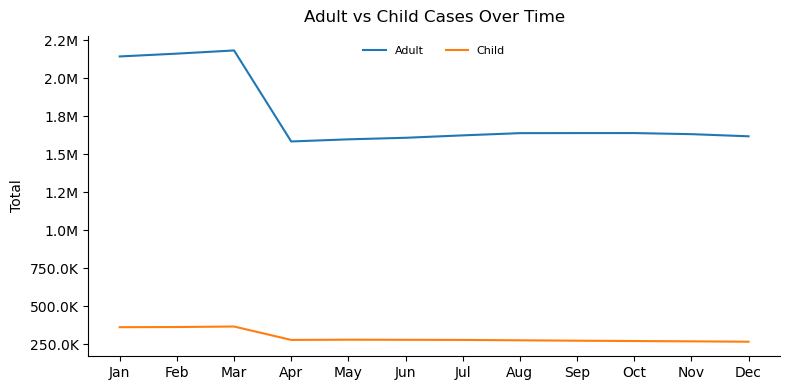

In [18]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=adult_vs_child_df,
    x='Month_Name',
    y='Total',
    hue='Adult_Child',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Adult vs Child Cases Over Time', pad=10)
plt.xlabel('')

plt.legend(ncols=2, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**

- 🧑 Adult Cases:
    - 🟦 **Consistently higher** volume throughout the year.
    - 📉 **Notable drop in April** (~2.15M → ~1.65M cases).
      - May suggest seasonal trends, system delays, or reporting lags.
    - 🔁 From May to December, volumes remain **stable with slight fluctuation** around ~1.7M.

- 👶 Child Cases:
    - 🟧 Relatively **flat and stable**, hovering just under **300K per month**.
    - 📉 A dip observed in **April**, mirroring adult trend, though less dramatic.


----